In [2]:
import tensorflow as tf 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import scipy
from scipy.sparse import csr_matrix;
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Programs\Anaconda\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or 

In [7]:
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets("MNIST_data") 
batch = mnist.train.next_batch(500)
tb = mnist.train.next_batch(100)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [25]:
y = batch[1]
x = batch[0]
testY = tb[1]
testX = tb[0]

x.shape

(500, 784)

In [26]:
#encoder = preprocessing.OneHotEncoder()
#y = encoder.fit(y)
#y.shape
#enc = preprocessing.OneHotEncoder()
# 2. FIT
#enc.fit(y)
# 3. Transform
#onehotlabels = enc.transform(y).toarray()
#onehotlabels.shape

ValueError: Expected 2D array, got 1D array instead:
array=[6 1 3 4 7 5 7 5 2 0 5 0 1 8 5 8 9 3 4 5 6 8 5 1 1 8 9 2 6 3 5 4 4 7 4 9 7
 4 6 3 2 1 6 8 7 6 3 8 6 7 0 3 9 7 3 4 7 4 5 9 6 0 0 7 2 3 2 2 0 9 9 0 8 3
 7 1 1 7 3 3 9 3 3 0 0 3 3 2 7 0 5 9 2 2 3 1 6 1 9 3 1 6 7 1 0 2 9 8 9 6 2
 8 0 9 5 8 5 4 5 1 9 3 7 9 4 9 6 3 2 8 3 0 8 7 0 3 7 0 1 2 2 9 7 9 2 2 0 8
 0 0 7 8 3 1 6 3 5 7 5 2 7 5 4 7 8 6 4 0 2 7 3 6 1 2 7 8 1 3 3 9 3 5 0 3 3
 0 3 9 9 8 1 2 7 3 9 1 0 5 5 6 4 6 8 6 4 2 7 9 4 8 8 9 9 5 8 6 9 5 6 1 6 4
 8 0 9 5 2 6 6 3 1 1 0 9 0 1 7 7 5 8 8 0 0 5 9 7 8 8 3 9 0 3 3 9 3 0 6 4 0
 3 2 3 1 9 3 3 2 8 1 3 3 7 7 9 5 8 8 8 5 3 2 4 0 0 8 6 2 1 2 8 4 2 0 3 3 9
 2 7 1 0 9 1 2 2 6 6 5 6 8 4 7 2 0 0 7 5 6 3 7 6 7 8 3 1 7 1 1 0 0 5 8 1 9
 7 7 9 7 2 7 7 1 4 6 1 7 8 2 1 4 6 9 8 6 0 4 8 6 9 7 0 8 5 8 1 6 5 3 4 6 6
 0 9 8 6 1 4 2 6 3 0 1 6 0 5 2 8 1 5 5 2 1 9 1 1 0 9 6 5 5 4 1 8 8 1 7 3 3
 5 7 1 4 6 5 8 6 7 4 2 2 8 3 1 0 5 3 3 2 9 5 7 3 8 3 0 3 3 9 4 9 8 3 8 5 2
 1 2 6 6 0 6 1 6 7 7 1 9 5 6 4 7 6 7 2 3 5 7 5 1 7 4 9 3 5 8 6 0 8 1 8 1 0
 7 2 1 9 3 9 6 8 6 8 6 6 6 9 7 5 1 4 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [158]:
#le = LabelEncoder()   
#y[0:,] = le.fit_transform(y[0:,]) 

In [20]:
#onehotencoder = OneHotEncoder() 
#y = onehotencoder.fit_transform(y).toarray()
#y.shape
#y[499]#
#y_train = OneHotEncoder().fit_transform(y).toarray()
#print(y_train)
#y_train.shape

(500, 10)

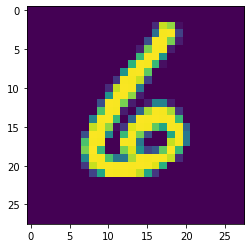

In [160]:
exampleNumber = 3 #Pick the example we want to visualize
example = batch[0][exampleNumber,:] #Then we load that example.
plt.imshow(np.reshape(example,[28,28])) #Next we reshape it to 28x28 and display it.

In [35]:
def getLoss(w,x,y,lam):
    m = x.shape[0] #First we get the number of training examples
    enc = preprocessing.OneHotEncoder()
    enc.fit(y)
    y_mat = enc.transform(y).toarray() #Next we convert the integer class coding into a one-hot representation
    scores = np.dot(x,w) #Then we compute raw class scores given our input and current weights
    prob = softmax(scores) #Next we perform a softmax on these scores to get their probabilities
    #loss = (-1 / m) * np.sum(np.mat(y_mat).T * np.log(prob)) + (lam/2)*np.sum(w*w) #We then find the loss of the probabilities
    loss = -1 * np.sum(y_mat.T * np.log(prob))
    grad = (-1 / m) * np.dot(x,(y_mat - prob)) + lam*w #And compute the gradient for that loss
    return loss,grad

In [36]:
#def oneHotIt(Y):
#    m = Y.shape[0]
#    #Y = Y[:,0]
#    OHX = scipy.sparse.csr_matrix((np.ones(m),(Y, np.array(range(m)))))
#    OHX = np.array(OHX.todense()).T
#    return OHX

In [37]:
def softmax(z):
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [38]:
def getProbsAndPreds(someX):
    probs = softmax(np.dot(someX,w))
    preds = np.argmax(probs,axis=1)
    return probs,preds

In [39]:
w = np.zeros([x.shape[1],len(np.unique(y))])
lam = 1
iterations = 1000
learningRate = 1e-5
losses = []
for i in range(iterations):
    loss,grad = getLoss(w,x,y,lam)
    losses.append(loss)
    w = w - (learningRate * grad)
print(loss)

ValueError: Expected 2D array, got 1D array instead:
array=[6 1 3 4 7 5 7 5 2 0 5 0 1 8 5 8 9 3 4 5 6 8 5 1 1 8 9 2 6 3 5 4 4 7 4 9 7
 4 6 3 2 1 6 8 7 6 3 8 6 7 0 3 9 7 3 4 7 4 5 9 6 0 0 7 2 3 2 2 0 9 9 0 8 3
 7 1 1 7 3 3 9 3 3 0 0 3 3 2 7 0 5 9 2 2 3 1 6 1 9 3 1 6 7 1 0 2 9 8 9 6 2
 8 0 9 5 8 5 4 5 1 9 3 7 9 4 9 6 3 2 8 3 0 8 7 0 3 7 0 1 2 2 9 7 9 2 2 0 8
 0 0 7 8 3 1 6 3 5 7 5 2 7 5 4 7 8 6 4 0 2 7 3 6 1 2 7 8 1 3 3 9 3 5 0 3 3
 0 3 9 9 8 1 2 7 3 9 1 0 5 5 6 4 6 8 6 4 2 7 9 4 8 8 9 9 5 8 6 9 5 6 1 6 4
 8 0 9 5 2 6 6 3 1 1 0 9 0 1 7 7 5 8 8 0 0 5 9 7 8 8 3 9 0 3 3 9 3 0 6 4 0
 3 2 3 1 9 3 3 2 8 1 3 3 7 7 9 5 8 8 8 5 3 2 4 0 0 8 6 2 1 2 8 4 2 0 3 3 9
 2 7 1 0 9 1 2 2 6 6 5 6 8 4 7 2 0 0 7 5 6 3 7 6 7 8 3 1 7 1 1 0 0 5 8 1 9
 7 7 9 7 2 7 7 1 4 6 1 7 8 2 1 4 6 9 8 6 0 4 8 6 9 7 0 8 5 8 1 6 5 3 4 6 6
 0 9 8 6 1 4 2 6 3 0 1 6 0 5 2 8 1 5 5 2 1 9 1 1 0 9 6 5 5 4 1 8 8 1 7 3 3
 5 7 1 4 6 5 8 6 7 4 2 2 8 3 1 0 5 3 3 2 9 5 7 3 8 3 0 3 3 9 4 9 8 3 8 5 2
 1 2 6 6 0 6 1 6 7 7 1 9 5 6 4 7 6 7 2 3 5 7 5 1 7 4 9 3 5 8 6 0 8 1 8 1 0
 7 2 1 9 3 9 6 8 6 8 6 6 6 9 7 5 1 4 0].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

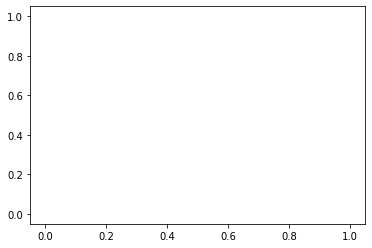

In [34]:
plt.plot(losses)

In [33]:
def getAccuracy(someX,someY):
    prob,prede = getProbsAndPreds(someX)
    accuracy = sum(prede == someY)/(float(len(someY)))
    return accuracy

In [34]:
print('Training Accuracy: ', getAccuracy(x,y))
print('Test Accuracy: ', getAccuracy(testX,testY))

D:\Programs\Anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  This is separate from the ipykernel package so we can avoid doing imports until


TypeError: 'bool' object is not iterable